In [1]:
import starry
import numpy as np
import time
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
l = [1, 2, 3, 5, 8, 13, 21, 34, 55]
npts = np.logspace(2, 6, 9)
t = np.zeros((len(npts), len(l)))
for i, lmax in enumerate(l):
    map = starry.Map(lmax)
    map[:] = np.random.randn(lmax)
    for j, n in enumerate(npts):
        ro = 0.1
        xo = np.linspace(-0.8, 0.8, n)
        tstart = time.time()
        map.flux(xo=xo, ro=ro)
        t[j, i] = time.time() - tstart

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


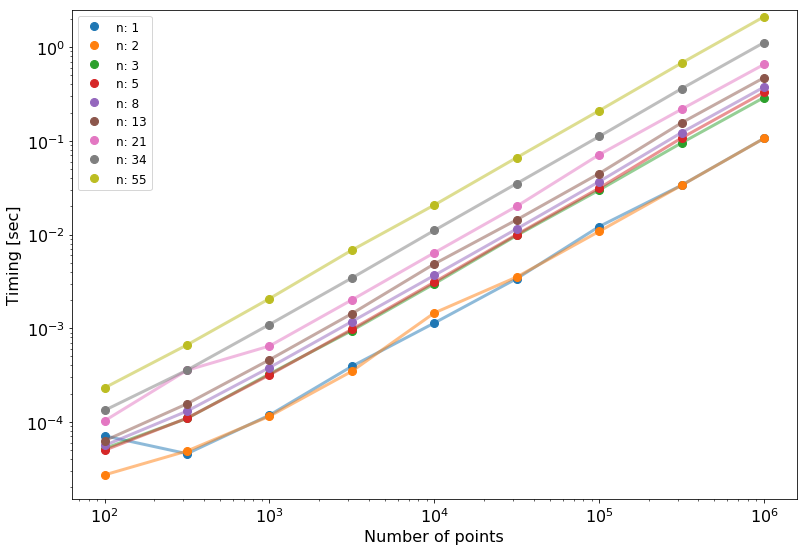

In [3]:
fig, ax = pl.subplots(1, figsize=(13, 9))
for ti, lmax, i in zip(t.transpose(), l, range(len(l))):
    ax.plot(npts, ti, 'o', color='C%d' % i, label="n: %s" % lmax, ms=8)
    ax.plot(npts, ti, '-', color='C%d' % i, alpha=0.5, lw=3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=12)
ax.set_xlabel('Number of points', fontsize=16)
ax.set_ylabel('Timing [sec]', fontsize=16)
ax.set_ylim(1.5e-5, 2.5)
for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)